
The general process for ARIMA models is the following:

Visualize the Time Series Data

Make the time series data stationary

Plot the Correlation and AutoCorrelation Charts

Construct the ARIMA Model or Seasonal ARIMA based on the data

Use the model to make predictions

**Let's go through these steps!**



Uploading the file to Google Colaboratory


In [1]:
from google.colab import files

uploaded = files.upload()

Saving netflix-stocks-data.csv to netflix-stocks-data.csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('netflix-stocks-data.csv')



In [3]:
df.head(20)

,Date,Close/Last,Volume,Open,High,Low
0,07/17/2020,$492.99,24991350,$494.87,$503.59,$484.14
1,07/16/2020,$527.39,24498990,$526.48,$535.54,$504.3627
2,07/15/2020,$523.26,10066650,$516.3,$529,$510.18
3,07/14/2020,$524.88,15083300,$517.08,$525.5,$490.49
4,07/13/2020,$525.5,18399020,$567.98,$575.37,$520.96
5,07/10/2020,$548.73,21605590,$519.73,$555.8799,$511.28
6,07/09/2020,$507.76,5840541,$508.4,$510,$495.78
7,07/08/2020,$502.78,5691682,$498.576,$505.1,$493.81
8,07/07/2020,$493.16,5669870,$497.311,$504.82,$490.83
9,07/06/2020,$493.81,7838990,$480.77,$499.5,$479.8


Is there any null values present in the dataset?

In [4]:
df.isnull().sum()

Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64

In [5]:
df.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

I will only need Data and Close/Last columns


In [6]:
df = df[["Date", " Close/Last"]]

In [7]:
df

,Date,Close/Last
0,07/17/2020,$492.99
1,07/16/2020,$527.39
2,07/15/2020,$523.26
3,07/14/2020,$524.88
4,07/13/2020,$525.5
...,...,...
2512,07/26/2010,$14.6843
2513,07/23/2010,$15.3857
2514,07/22/2010,$14.7943
2515,07/21/2010,$17.0929


Lets rename the "Date" column with small letter - "date" and "Close/Last" with "close"

In [8]:
df = df.rename(columns = {'Date': 'date', ' Close/Last': "close"})


In [9]:
df

,date,close
0,07/17/2020,$492.99
1,07/16/2020,$527.39
2,07/15/2020,$523.26
3,07/14/2020,$524.88
4,07/13/2020,$525.5
...,...,...
2512,07/26/2010,$14.6843
2513,07/23/2010,$15.3857
2514,07/22/2010,$14.7943
2515,07/21/2010,$17.0929


I need to remove the $ symbol as this doesn't make any sense for this project purpose.

In [10]:
df['close'] = df['close'].str.replace("$", '')


In [11]:
df

,date,close
0,07/17/2020,492.99
1,07/16/2020,527.39
2,07/15/2020,523.26
3,07/14/2020,524.88
4,07/13/2020,525.5
...,...,...
2512,07/26/2010,14.6843
2513,07/23/2010,15.3857
2514,07/22/2010,14.7943
2515,07/21/2010,17.0929


In [12]:
df['date']=pd.to_datetime(df['date'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2517 non-null   datetime64[ns]
 1   close   2517 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 39.5+ KB


The datatype of "date" column is datetime. Previously it had object datatype 

In [14]:
df.set_index("date", inplace=True)

In [15]:
df.head()

,close
date,
2020-07-17,492.99
2020-07-16,527.39
2020-07-15,523.26
2020-07-14,524.88
2020-07-13,525.5


In [16]:
df["close"] =df["close"].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2020-07-17 to 2010-07-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2517 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [18]:
df

,close
date,
2020-07-17,492.9900
2020-07-16,527.3900
2020-07-15,523.2600
2020-07-14,524.8800
2020-07-13,525.5000
...,...
2010-07-26,14.6843
2010-07-23,15.3857
2010-07-22,14.7943


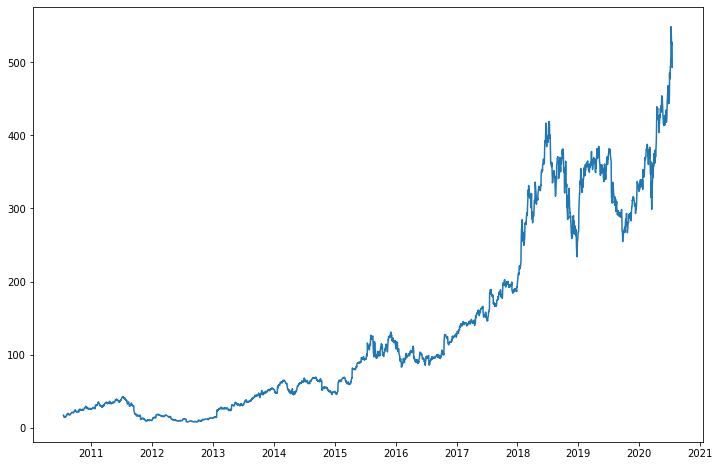

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))


plt.plot("close", data=df)
plt.show()

## Look at stationarity
Most time-series models assume that the underlying time-series data is **stationary**.  This assumption gives us some nice statistical properties that allows us to use various models for forecasting.

**Stationarity** is a statistical assumption that a time-series has:
*   **Constant mean**
*   **Constant variance**
*   **Autocovariance does not depend on time**


**Looking at our data:**
- Rolling mean and standard deviation look like they change over time.  There may be some de-trending and removing seasonality involved. Based on **Dickey-Fuller test**, because p = 0.166, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that we fail to reject the null hypothesis that our **time series is not stationary**.

In [20]:
from statsmodels.tsa.stattools import adfuller


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
test_result=adfuller(df['close'])


In [22]:
def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [23]:
adfuller_test(df['close'])


ADF Test Statistic : -2.3171134560949835
p-value : 0.16650793004714354
#Lags Used : 27
Number of Observations Used : 2489
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# **Eliminating trend and seasonality**

**Transformation**

Examples. Log, square root, etc.

**Smoothing**

Examples. Weekly average, monthly average, rolling averages.

**Differencing**

Examples. First-order differencing.

**Polynomial Fitting**

Examples. Fit a regression model.

# Differencing
I used the difference shift as one month (30 days)

In [24]:
df['close difference']=df['close']-df['close'].shift(30)


In [25]:
adfuller_test(df['close difference'].dropna())


ADF Test Statistic : -8.684979819519864
p-value : 4.1870112113546216e-14
#Lags Used : 27
Number of Observations Used : 2459
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


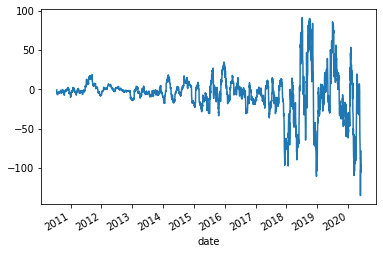

In [26]:
df['close difference'].plot()

# Transformation
After doing the differencing we found that our data is stationary, but I also want to see the log version of the differencing. If the log of differencing gives us a better result , I will use log of difference for the further process.

In [27]:
df['close_log'] = df['close'].apply(lambda x: np.log(x))


In [28]:
df

,close,close difference,close_log
date,,,
2020-07-17,492.9900,NaN,6.200489
2020-07-16,527.3900,NaN,6.267940
2020-07-15,523.2600,NaN,6.260078
2020-07-14,524.8800,NaN,6.263170
2020-07-13,525.5000,NaN,6.264350
...,...,...,...
2010-07-26,14.6843,-5.5714,2.686779
2010-07-23,15.3857,-4.3972,2.733439
2010-07-22,14.7943,-4.9200,2.694242


In [29]:
df['close_log_difference']=df['close_log']-df['close_log'].shift(30)


In [30]:
df

,close,close difference,close_log,close_log_difference
date,,,,
2020-07-17,492.9900,NaN,6.200489,NaN
2020-07-16,527.3900,NaN,6.267940,NaN
2020-07-15,523.2600,NaN,6.260078,NaN
2020-07-14,524.8800,NaN,6.263170,NaN
2020-07-13,525.5000,NaN,6.264350,NaN
...,...,...,...,...
2010-07-26,14.6843,-5.5714,2.686779,-0.321657
2010-07-23,15.3857,-4.3972,2.733439,-0.251379
2010-07-22,14.7943,-4.9200,2.694242,-0.287102


In [31]:
adfuller_test(df['close_log_difference'].dropna())


ADF Test Statistic : -8.367691241489982
p-value : 2.7148327677128136e-13
#Lags Used : 25
Number of Observations Used : 2461
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


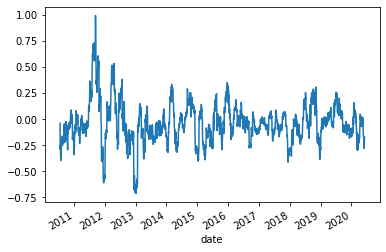

In [32]:
df["close_log_difference"].plot()

# **ARIMA models**
**ARIMA = Auto-Regressive Integrated Moving Average.**

**Assumptions.** The time-series is stationary.

Depends on:
1. Number of AR (Auto-Regressive) terms (p).
2. Number of I (Integrated or Difference) terms (d).
3. Number of MA (Moving Average) terms (q).


# **ACF and PACF Plots**
How do we determine p, d, and q? For p and q, we can use ACF and PACF plots (below).

**Autocorrelation Function (ACF).** Correlation between the time series with a lagged version of itself (e.g., correlation of Y(t) with Y(t-1)).

**Partial Autocorrelation Function (PACF).** Additional correlation explained by each successive lagged term.

**How do we interpret ACF and PACF plots?**

p – Lag value where the PACF chart crosses the upper confidence interval for the first time.

q – Lag value where the ACF chart crosses the upper confidence interval for the first time.

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels

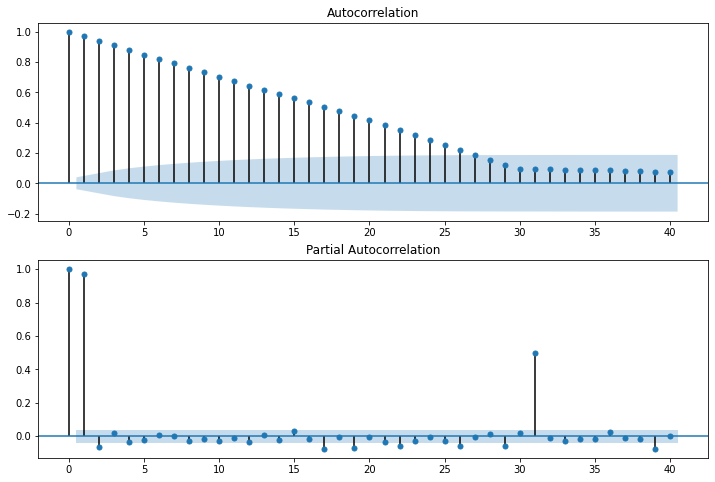

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df['close_log_difference'].iloc[31:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df['close_log_difference'].iloc[31:],lags=40,ax=ax2)

In [38]:
df = df.iloc[31:]

In [39]:
def run_arima_model(df, ts, p, d, q):
  """
  Run ARIMA model
  """
  from statsmodels.tsa.arima_model import ARIMA

  # fit ARIMA model on time series
  model = ARIMA(df[ts], order=(p, d, q))  
  results_ = model.fit(disp=-1)  
  
  # get lengths correct to calculate RSS
  len_results = len(results_.fittedvalues)
  ts_modified = df[ts][-len_results:]
  
  # calculate root mean square error (RMSE) and residual sum of squares (RSS)
  rss = sum((results_.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss / len(df[ts]))
  
  # plot fit
  plt.plot(df[ts])
  plt.plot(results_.fittedvalues, color = 'red')
  plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))
  
  plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


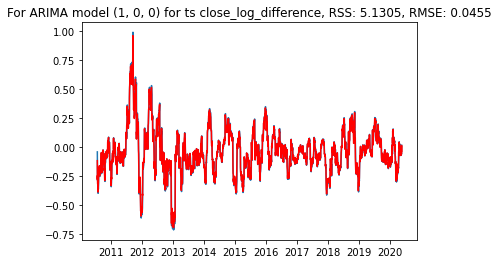

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


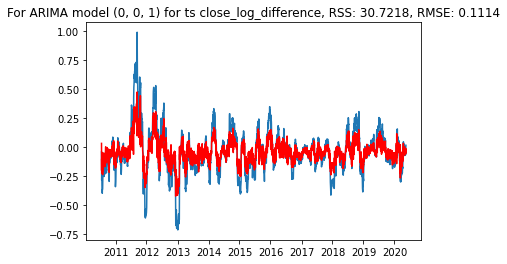

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


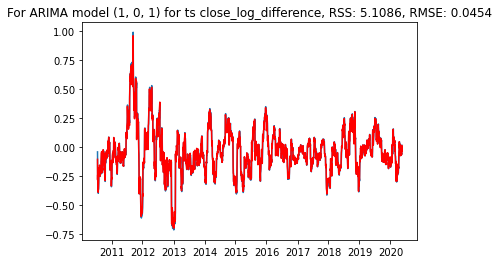

In [40]:
# Note: I do the differencing in the transformation of the data 'ts_log_diff'
# AR model with 1st order differencing - ARIMA (1,0,0)
model_AR = run_arima_model(df = df, 
                           ts = 'close_log_difference', 
                           p = 1, 
                           d = 0, 
                           q = 0)

# MA model with 1st order differencing - ARIMA (0,0,1)
model_MA = run_arima_model(df = df, 
                           ts = 'close_log_difference', 
                           p = 0, 
                           d = 0, 
                           q = 1)

# ARMA model with 1st order differencing - ARIMA (1,0,1)
model_MA = run_arima_model(df = df, 
                           ts = 'close_log_difference', 
                           p = 1, 
                           d = 0, 
                           q = 1)